# Step 1 : Brief description of the problem and data

An algorithm is needed to be presented to identify metastatic cancer from small image patches taken from a larger digital pathology scan.The total number of images are of dimension 96 * 96 * 3 and the training data size is 220025.The labels are either 1 representing a cancer positive case and 0 representing cancer negetive case.

# Step 2 : Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data 

In [1]:
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
train_dataset = pd.read_csv("/kaggle/input/histopathologic-cancer-detection/train_labels.csv")
#func = lambda x : "Train/"+x+".tif"
func = lambda x : "/kaggle/input/histopathologic-cancer-detection/train/"+x+".tif"
train_dataset.id = train_dataset.id.apply(func)
train_dataset.head()

,id,label
0,/kaggle/input/histopathologic-cancer-detection...,0
1,/kaggle/input/histopathologic-cancer-detection...,1
2,/kaggle/input/histopathologic-cancer-detection...,0
3,/kaggle/input/histopathologic-cancer-detection...,0
4,/kaggle/input/histopathologic-cancer-detection...,0


The total number of training data points : 220025


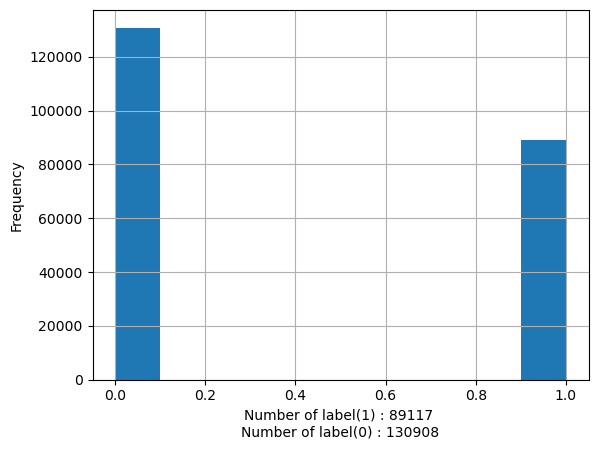

In [3]:
# Showing some of the images 
dataset_size = len(train_dataset)
print("The total number of training data points : {}".format(dataset_size))

label1 = len(train_dataset[train_dataset.label == 1])
label0 = len(train_dataset[train_dataset.label == 0])

# Histogram of the image labels
train_dataset.label.hist()
plt.xlabel("Number of label(1) : {} \nNumber of label(0) : {}".format(label1,label0))
plt.ylabel("Frequency")
plt.show()

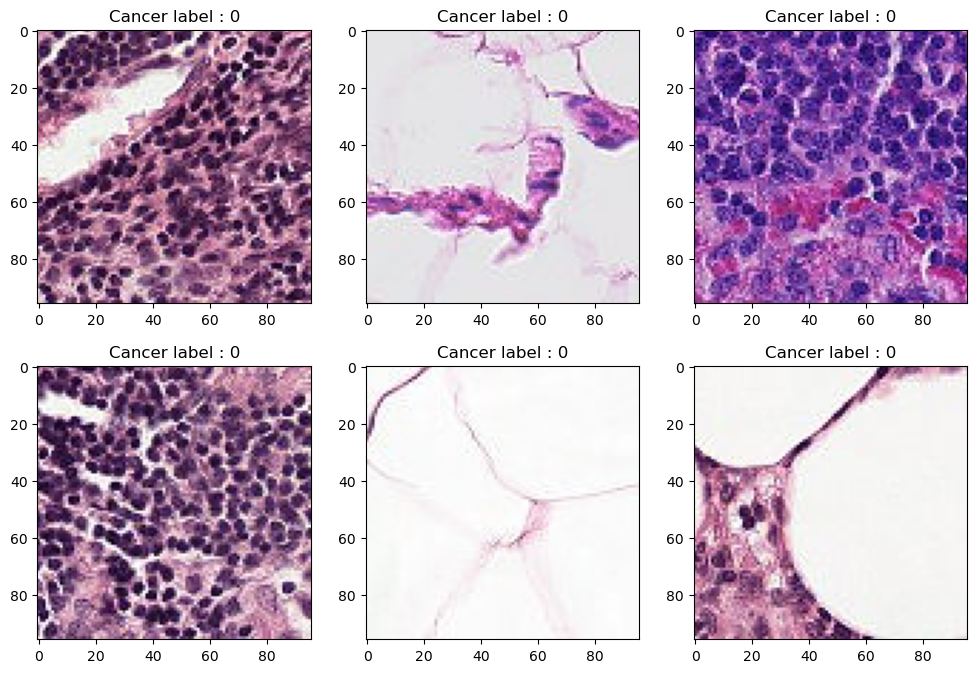

In [4]:
show_samples = 6
plt.figure(figsize = (12,8))
for sample_idx in range(show_samples):
    
    # Fetching the image
    random_idx = np.random.choice(range(dataset_size))
    img = mpimg.imread(train_dataset.iloc[random_idx].id)
    img_label = train_dataset.iloc[random_idx].label
    
    # Plotting
    plt.subplot(2,3,sample_idx+1)
    plt.imshow(img)
    plt.title("Cancer label : {}".format(img_label))
    
plt.show()

In [5]:
train_dataset.describe()

,label
count,220025.000000
mean,0.405031
std,0.490899
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [6]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220025 entries, 0 to 220024
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      220025 non-null  object
 1   label   220025 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


# Step 3 : DModel Architecture 

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,Flatten,Dense,BatchNormalization,Activation
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
print(tf.__version__)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

2.12.0


In [8]:
def create_model():
    model = Sequential()
    model.add(Convolution2D(24,(5,5),(2,2),input_shape=(96,96,3),activation='relu',name = "cnn_l1"))    # channel,kernel,stride
    model.add(Convolution2D(36,(5,5),(2,2),activation='relu',name = "cnn_l2"))
    model.add(Convolution2D(48,(3,3),activation='relu',name = "cnn_l3"))
    model.add(Convolution2D(64,(3,3),activation='relu',name = "cnn_l4"))
    model.add(Convolution2D(64,(3,3),activation='relu',name = "cnn_l5"))
    model.add(Convolution2D(32,(3,3),activation='relu',name = "cnn_l6"))
    model.add(Flatten())
    model.add(Dense(2704,activation='relu',name = "fc_l1"))
    model.add(Dense(1352,activation='relu',name = "fc_l2"))
    model.add(Dense(676,activation='relu',name = "fc_l3"))
    model.add(Dense(338,activation='relu',name = "fc_l4"))
    model.add(Dense(100,activation='relu',name = "fc_l5"))
    model.add(Dense(50,activation='relu',name = "fc_l6"))
    model.add(Dense(100,activation='relu',name = "fc_l7"))
    model.add(Dense(1,activation='sigmoid',name = "fc_l8"))
    
    model.compile(Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cnn_l1 (Conv2D)             (None, 46, 46, 24)        1824      
                                                                 
 cnn_l2 (Conv2D)             (None, 21, 21, 36)        21636     
                                                                 
 cnn_l3 (Conv2D)             (None, 19, 19, 48)        15600     
                                                                 
 cnn_l4 (Conv2D)             (None, 17, 17, 64)        27712     
                                                                 
 cnn_l5 (Conv2D)             (None, 15, 15, 64)        36928     
                                                                 
 cnn_l6 (Conv2D)             (None, 13, 13, 32)        18464     
                                                                 
 flatten (Flatten)           (None, 5408)              0

# Step 4 : Results and Analysis 

**Batch generator**

In [9]:
def batch_gen(df,batch_size,training = True):
    while True:
        
        img_batch = []
        label_batch = []
        
        for i in range(batch_size):
            idx = random.randint(0,len(df)-1)
            img = mpimg.imread(df.iloc[idx].id)
            label = df.iloc[idx].label
            
            img = img/255   # Image normalization
            
            img_batch.append(img)
            label_batch.append(label)
            
        yield (np.asarray(img_batch),np.asarray(label_batch))

In [10]:
# Splitting the dataset into training and validation dataset
from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(train_dataset, test_size=0.2, random_state=42)

**Model Training**

In [11]:
batch_size = 32

model.fit(batch_gen(train_data,batch_size),steps_per_epoch=20,epochs=20,
          validation_data=batch_gen(val_data,batch_size),validation_steps=20)

Epoch 1/20
20/20 [==============================] - 19s 819ms/step - loss: 0.6911 - accuracy: 0.5281 - val_loss: 0.6750 - val_accuracy: 0.6047
Epoch 2/20
20/20 [==============================] - 15s 777ms/step - loss: 0.6765 - accuracy: 0.5953 - val_loss: 0.6700 - val_accuracy: 0.5906
Epoch 3/20
20/20 [==============================] - 14s 737ms/step - loss: 0.6521 - accuracy: 0.6391 - val_loss: 0.6649 - val_accuracy: 0.6109
Epoch 4/20
20/20 [==============================] - 14s 728ms/step - loss: 0.6874 - accuracy: 0.5625 - val_loss: 0.6767 - val_accuracy: 0.6062
Epoch 5/20
20/20 [==============================] - 14s 700ms/step - loss: 0.6459 - accuracy: 0.6203 - val_loss: 0.6242 - val_accuracy: 0.6219
Epoch 6/20
20/20 [==============================] - 13s 692ms/step - loss: 0.6168 - accuracy: 0.5953 - val_loss: 0.5931 - val_accuracy: 0.6016
Epoch 7/20
20/20 [==============================] - 13s 690ms/step - loss: 0.5760 - accuracy: 0.6453 - val_loss: 0.5996 - val_accuracy: 0.6687

In [12]:
from keras.models import save_model

# Save the entire model to a single file
save_model(model, 'model.h5')

# Step 5 : Conclusion

In [13]:
from keras.models import load_model
from tqdm import tqdm
model = load_model('model.h5')

In [14]:
img_files = os.listdir("/kaggle/input/histopathologic-cancer-detection/test/")
filter_func = lambda x : x.endswith(".tif")
map_func = lambda x : "/kaggle/input/histopathologic-cancer-detection/test/"+x
img_files = list(filter(filter_func,img_files))
img_files = list(map(map_func,img_files))

In [15]:
batch_size = 1000
idx = 0
df = []

while idx < len(img_files):
    img_arr = []
    for img_file in img_files[idx:idx+batch_size]:
        img = mpimg.imread(img_file)
        img = img/255
        img = np.expand_dims(img,axis = 0)
        img_arr.append(img)
        
    imgs = np.concatenate(img_arr,axis = 0)
    predictions = model(imgs)
    
    if len(df) == 0:
        df = pd.DataFrame({"id" : img_files[idx:idx+batch_size],"label" : predictions[:,0]})
    else:
        new_df = pd.DataFrame({"id" : img_files[idx:idx+batch_size],"label" : predictions[:,0]})
        df = pd.concat([df,new_df],axis = 0)
        
    idx += batch_size
    print("Images Processed : ",idx)

Images Processed :  1000
Images Processed :  2000
Images Processed :  3000
Images Processed :  4000
Images Processed :  5000
Images Processed :  6000
Images Processed :  7000
Images Processed :  8000
Images Processed :  9000
Images Processed :  10000
Images Processed :  11000
Images Processed :  12000
Images Processed :  13000
Images Processed :  14000
Images Processed :  15000
Images Processed :  16000
Images Processed :  17000
Images Processed :  18000
Images Processed :  19000
Images Processed :  20000
Images Processed :  21000
Images Processed :  22000
Images Processed :  23000
Images Processed :  24000
Images Processed :  25000
Images Processed :  26000
Images Processed :  27000
Images Processed :  28000
Images Processed :  29000
Images Processed :  30000
Images Processed :  31000
Images Processed :  32000
Images Processed :  33000
Images Processed :  34000
Images Processed :  35000
Images Processed :  36000
Images Processed :  37000
Images Processed :  38000
Images Processed :  3

In [16]:
submission_df = df.copy()
submission_df.id = submission_df.id.apply(lambda x : x.split('/')[-1])
submission_df.label = submission_df.label.apply(lambda x : 1 if x > 0.5 else 0)
submission_df

,id,label
0,a7ea26360815d8492433b14cd8318607bcf99d9e.tif,0
1,59d21133c845dff1ebc7a0c7cf40c145ea9e9664.tif,0
2,5fde41ce8c6048a5c2f38eca12d6528fa312cdbb.tif,1
3,bd953a3b1db1f7041ee95ff482594c4f46c73ed0.tif,1
4,523fc2efd7aba53e597ab0f69cc2cbded7a6ce62.tif,0
...,...,...
453,7907c88a7f5f9c8ca5b2df72c1e6ff9650eea22b.tif,0
454,2a6fc1ed16fa94d263efab330ccbeb1906cbd421.tif,1
455,6bb5c0611c0ccf4713e0ccbc0e8c54bcb498ef14.tif,1
456,f11e7c9e77cbc1ec916a52e6b871a293ee1bb928.tif,0


In [17]:
submission_df.to_csv('submission.csv')